In [46]:
import numpy as np
import os, sys, time, subprocess, h5py, argparse, logging, pickle, random
from os.path import join as oj
import pandas as pd
import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import imageio

# load in data from logs

In [74]:
# load in data from logs
def load_results(path_to_results):
    results = {}
    for dirname in os.listdir(path_to_results):
        if not '.png' in dirname and not 'Icon' in dirname:
            try:
                d = {}
                x = np.loadtxt(oj(path_to_results, dirname, 'log.txt'), skiprows=1)
                d['train'] = x[:, -2]
                d['val'] = x[:, -1]
                filter_name = [x for x in os.listdir(oj(path_to_results, dirname)) if 'filters' in x]
                if len(filter_name) == 1:
                    d['filters'] = imageio.imread(oj(path_to_results, dirname, filter_name[0]))
                results[dirname] = d
            except:
                pass
    return results

path_to_results = '/Users/chandan/drive/research/vision/scat/scat_results/cifar100/checkpoint'
out_dir = '/Users/chandan/drive/research/vision/scat/background/figs'
results = load_results(path_to_results)
print(results.keys())

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

dict_keys(['j2l3_n2', 'j2l2', 'j2l3', 'j2l4', 'j2l2_n2', 'j2l4_n2', 'alexnet', 'alexnet_n2'])


# plot curves

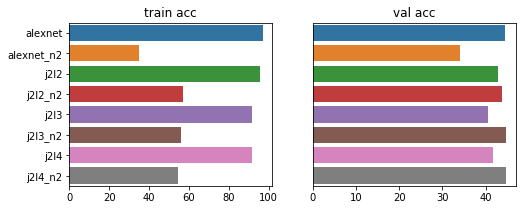

In [76]:
keys = sorted(list(results.keys()))
dicts = [results[key] for key in keys]

plt.figure(figsize=(8, 3), facecolor='white')

# plot train acc
plt.subplot(121)
sns.barplot([np.max(d['train']) for d in dicts], keys, orient='h')
plt.title('train acc')

# plot test acc
plt.subplot(122)
sns.barplot([np.max(d['val']) for d in dicts], keys, orient='h')
plt.gca().get_yaxis().set_visible(False)
plt.title('val acc')

# save and show
plt.savefig(oj(out_dir, 'cifar100_accs.pdf'))
plt.show()

# plot final train / val accs

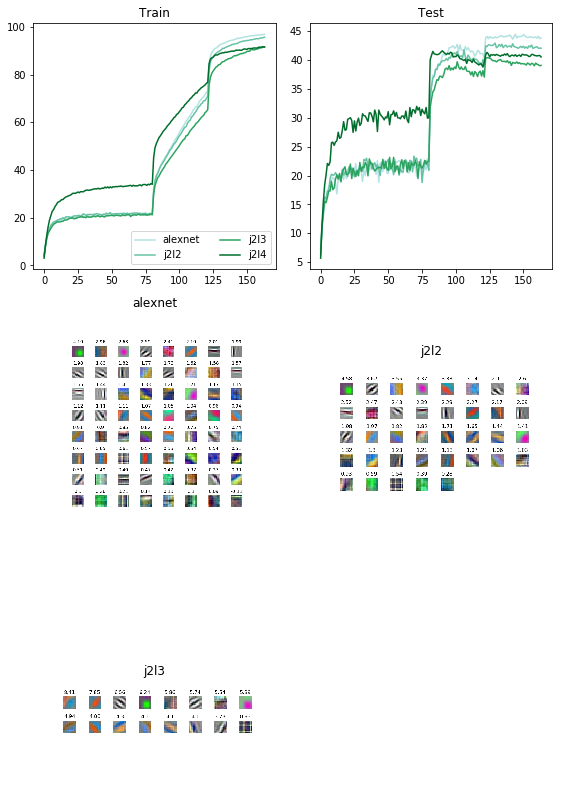

In [93]:
keys = sorted(list(results.keys()))
# filter out n2 / not n2
n2 = False
if n2:
    keys = [key for key in keys if 'n2' in key]
else:
    keys = [key for key in keys if 'n2' not in key]
dicts = [results[key] for key in keys]

plt.figure(figsize=(8, 12), facecolor='white')


cs_4 = ['#b2e2e2','#66c2a4','#2ca25f','#006d2c']

# plot train
plt.subplot(321)
plt.title('Train')
for i, key in enumerate(keys):
    plt.plot(dicts[i]['train'], color=cs_4[i], label=key)
plt.legend(ncol=2, loc='lower right')

# plot test
plt.subplot(322)
plt.title('Test')
for i, key in enumerate(keys):
    plt.plot(dicts[i]['val'], color=cs_4[i], label=key)
# plt.legend()

for i, key in enumerate(keys[:-1]):
    plt.subplot(3, 2, 3 + i)
    plt.title(key)
    plt.imshow(dicts[i]['filters'])
    plt.axis('off')

plt.tight_layout()
# save and show
plt.savefig(oj(out_dir, 'accs_n2=' + str(n2) + '.pdf'), dpi=600)
plt.show()
